<a href="https://colab.research.google.com/github/bsenst/UWWi_DataDive_Dec22/blob/main/external_datasets/news/call_volumens_and_news_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# loading datasets

In [1]:
import pandas as pd

In [142]:
drought = pd.read_csv("https://raw.githubusercontent.com/datakind/UWWi_DataDive_Dec22/main/external_datasets/news/Wisconsin%20Drought.csv")
extreme = pd.read_csv("https://raw.githubusercontent.com/datakind/UWWi_DataDive_Dec22/main/external_datasets/news/Wisconsin%20Extreme%20Weather.csv")
financial = pd.read_csv("https://raw.githubusercontent.com/datakind/UWWi_DataDive_Dec22/main/external_datasets/news/Wisconsin%20Financial%20Crisis.csv")
fire = pd.read_csv("https://raw.githubusercontent.com/datakind/UWWi_DataDive_Dec22/main/external_datasets/news/Wisconsin%20Fire.csv")
flood = pd.read_csv("https://raw.githubusercontent.com/datakind/UWWi_DataDive_Dec22/main/external_datasets/news/Wisconsin%20Flood.csv")
heat = pd.read_csv("https://raw.githubusercontent.com/datakind/UWWi_DataDive_Dec22/main/external_datasets/news/Wisconsin%20Heat.csv")
housing = pd.read_csv("https://raw.githubusercontent.com/datakind/UWWi_DataDive_Dec22/main/external_datasets/news/Wisconsin%20Housing%20Crisis.csv")
emergency = pd.read_csv("https://raw.githubusercontent.com/datakind/UWWi_DataDive_Dec22/main/external_datasets/news/Wisconsin_Emergency.csv")
# wisconsin = pd.read_csv("https://raw.githubusercontent.com/datakind/UWWi_DataDive_Dec22/main/external_datasets/news/wisconsin.csv")
weather = pd.read_csv("https://raw.githubusercontent.com/datakind/UWWi_DataDive_Dec22/main/external_datasets/news/wisconsin_weather.csv")
disaster = pd.read_csv("https://raw.githubusercontent.com/datakind/UWWi_DataDive_Dec22/main/external_datasets/news/wisconsin_disaster.csv")

In [143]:
df = pd.DataFrame()
df = df.append(drought)
df = df.append(extreme)
df = df.append(financial)
df = df.append(fire)
df = df.append(flood)
df = df.append(heat)
df = df.append(housing)
df = df.append(emergency)
# df = df.append(wisconsin)
df = df.append(weather)
df = df.append(disaster)

In [8]:
df.shape

(1498, 9)

In [10]:
df.isna().sum()

Unnamed: 0       0
title            0
desc             0
date             0
datetime       791
link             0
img              0
media         1383
site          1404
dtype: int64

# parsing dates

In [144]:
dates = []

month = dict()
month["Jan"] = "1"
month["Feb"] = "2"
month["Mar"] = "3"
month["Apr"] = "4"
month["May"] = "5"
month["Jun"] = "6"
month["Jul"] = "7"
month["Aug"] = "8"
month["Sep"] = "9"
month["Oct"] = "10"
month["Nov"] = "11"
month["Dec"] = "12"

for date in list(df.date):
  try:
    date = date.split()
    # if len(date) == 3 and date[-1][:2] == "20":
    if len(date) == 3 and date[-1][:2] == "2022":
      date[0] = month[date[0]]
      # print(date)
      dates.append(("-".join(date)).replace(",", ""))
    elif len(date) == 2 and str(date[0]).isalpha:
      date[0] = month[date[0]]
      # print(date)
      dates.append("-".join(date)+"-2022")
    else:
      dates.append("")
      # print(date)
  except:
    dates.append("")

In [48]:
df.columns

Index(['Unnamed: 0', 'title', 'desc', 'date', 'datetime', 'link', 'img',
       'media', 'site'],
      dtype='object')

In [ ]:
dates

In [145]:
df["date_parsed"] = dates
df = df.drop(['Unnamed: 0', 'desc', 'date', 'datetime', 'img',
       'media', 'site'], axis=1)
df.head()

,title,link,date_parsed
0,"U.S. Drought: Weekly Report for November 15, 2022",news.google.com/./articles/CBMiSGh0dHBzOi8vd3d...,11-15-2022
1,Latest report shows extreme drought conditions...,news.google.com/./articles/CBMiamh0dHBzOi8va3N...,11-3-2022
2,Takeaways and run-stuffing top priorities for ...,news.google.com/./articles/CBMitgFodHRwczovL29...,11-16-2022
3,Drought conditions better in western Kentucky ...,news.google.com/./articles/CBMiV2h0dHBzOi8vd3d...,11-12-2022
4,"Temperature swings, wind, snow; very cold Satu...",news.google.com/./articles/CBMiX2h0dHBzOi8vd3d...,


In [146]:
uwwi22 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2022.csv")
uwwi22["Interaction_CreateStamp"] = pd.to_datetime(uwwi22.Interaction_CreateStamp, utc=True)
uwwi22["Interaction_EditStamp"] = pd.to_datetime(uwwi22.Interaction_EditStamp, utc=True)
uwwi22.head()

,Client_Id,Interaction_CreateStamp,Interaction_ClientId,Interaction_Id,Interaction_CreateAccountId_href_label,Interaction_CreatePortalId,Interaction_CreateFormsetDeploymentId,Interaction_EditAccountId_href_label,Interaction_EditPortalId,Interaction_EditFormsetDeploymentId,...,InteractionOption_SwfSecondaryNeeds,InteractionOption_SwfCounty,InteractionOption_WhyWasThereNoReferralGiven,InteractionOption_UnableToContact,InteractionCustom_CallerReached,InteractionCustom_FollowUpUnmetNeeds,InteractionCustom_FollowUpComplete,InteractionCustom_FollowUpAttempt1,InteractionCustom_FollowUpAttempt2,InteractionCustom_FollowUpAttempt3
0,22934,2022-12-01 18:53:00.606552+00:00,22934,1405553,Lorena Lezama (805),1,689,Lorena Lezama (805),1,689,...,[],['Milwaukee'],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
1,24900,2022-12-01 15:59:04.836496+00:00,24900,1405339,Teri Goodman (1258),1,689,Teri Goodman (1258),1,689,...,[],['Milwaukee'],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
2,27820,2022-12-01 15:57:35.767512+00:00,27820,1405337,Melody Hobbs (743),1,689,Melody Hobbs (743),1,689,...,[],['Milwaukee'],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
3,34433,2022-12-01 15:56:07.122672+00:00,34433,1405333,Teri Goodman (1258),1,689,Teri Goodman (1258),1,689,...,[],['Racine'],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN
4,24158,2022-12-01 14:58:26.516401+00:00,24158,1405271,Lorena Lezama (805),1,689,Lorena Lezama (805),1,689,...,[],['Milwaukee'],[],[],Unselected,Unselected,Unselected,NaN,NaN,NaN


# plotting call volume & news

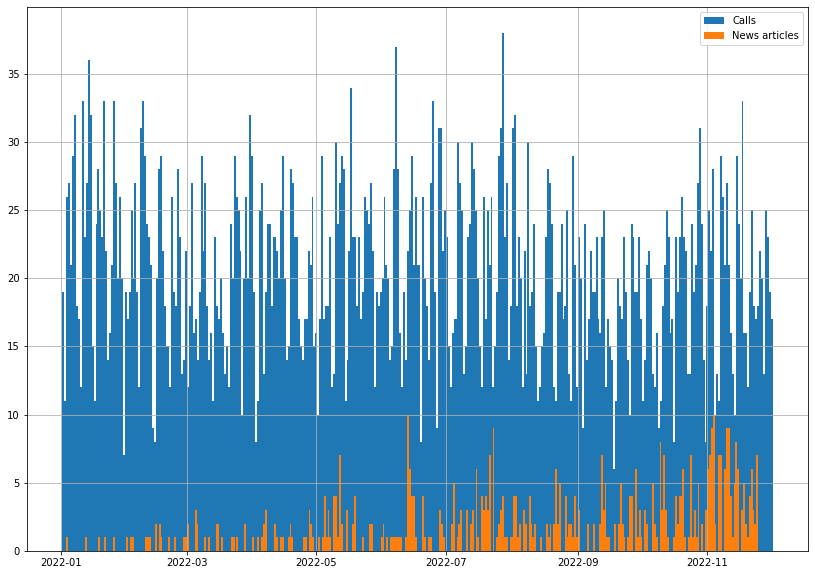

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
uwwi22.Interaction_CreateStamp.hist(bins=365)
pd.to_datetime(df.date_parsed, format="%m-%d-%Y", errors="coerce").hist(bins=365)
plt.legend(labels=["Calls", "News articles"])

In [129]:
df.date_parsed

0       11-15-2022
1        11-3-2022
2       11-16-2022
3       11-12-2022
4                 
          ...     
110               
111               
112    4-2022-2022
113               
114               
Name: date_parsed, Length: 1498, dtype: object

In [130]:
pd.to_datetime(df.date_parsed, format="%m-%d-%Y", errors="coerce")

0     2022-11-15
1     2022-11-03
2     2022-11-16
3     2022-11-12
4            NaT
         ...    
110          NaT
111          NaT
112          NaT
113          NaT
114          NaT
Name: date_parsed, Length: 1498, dtype: datetime64[ns]

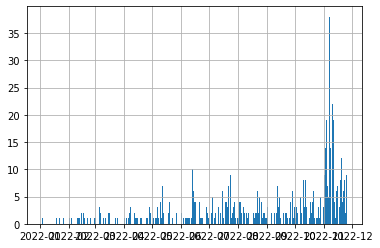

In [131]:
pd.to_datetime(df.date_parsed, format="%m-%d-%Y", errors="coerce").hist(bins=365)